## Project Motivation<a name="motivation"></a>

This project is part of Udacity Data Scientist Nano-Degree. For this project, I am interested in using latest Stack Overflow data from 2020 to better understand:

1. Who are the **Data Scientist?** What's the differences between data scientist and other developers?
2. How do we **explore** such amount of data? How can we **get quick idea before really dig deeper**?
3. Is there a **fast and scalable way** to explore and **compare the difference**?

## Project Descriptions <a name="files"></a>

The main notebook "stackoverflow_analytics.ipynb" provides a simple, fast and scalable way to explore and analyze structured questionaires like Stack Overflow Survey before really dig deeper into it. Ｗe can get the big picture of different groups and general "feelings" of data just by selecting interested column and run the code.

### Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import math
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data
df = pd.read_csv('survey_results_public.csv')

## Get the basic numbers of the survey

In [3]:
hired_respondant = df[~df["DevType"].isnull()]
print("All respondant: ",len(df))
print("hired respondants: ",len(hired_respondant))

All respondant:  64461
hired respondants:  49370


In [4]:
hired_respondant.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4


## What are the distribution of developer types?
* what are the developer types of our respondant?
* what type is the mainstream?
* how much data scientist are there?

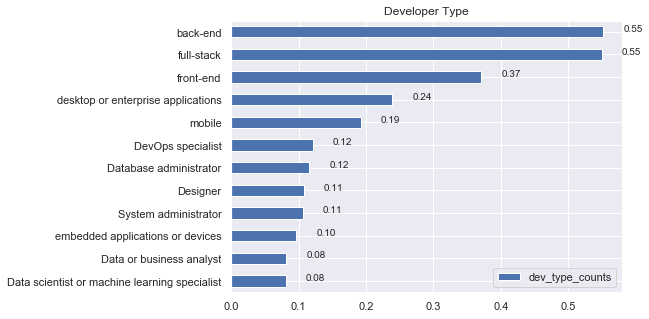

In [5]:
#get basic types from survey scheme
dev_types=["full-stack","back-end","front-end","mobile","desktop or enterprise applications", "embedded applications or devices", "Data scientist or machine learning specialist", "Database administrator", "Data or business analyst","DevOps specialist","Designer","System administrator"]

# get the counts of each given dev_types
count_of_DevType=[]
for dev_type in dev_types:
    count = len(df[df["DevType"].str.contains(dev_type, regex=True,na=False)])
    count_of_DevType.append(count)

#generate horizontal bar chart    
result =pd.DataFrame(data=np.array(count_of_DevType)/len(hired_respondant),index=dev_types, columns=['dev_type_counts'])
ax = result.sort_values(by=['dev_type_counts']).plot(kind='barh',figsize=(7,5),title='Developer Type');
for p in ax.patches:
    plt.text(0.03+p.get_width(), p.get_y()+0.55*p.get_height(),'{:1.2f}'.format(p.get_width()))

###### Findings at a glimps:
* it seems like data scientist or analyst aren't much in the industry (8% + 8%)
* the most popular types are back-end & full-stack & front-end

##  Select Interesting Columns
* you can pick what you like -- i just pick mine
* there are 3 types of question in the questionaires (also in other standard questionaires), you should put your interested columns into one of these types
    * numerical questions
    * multi-select questions
    * multiple choice questions

In [6]:
numeric_columns = ["Age", "Age1stCode", "ConvertedComp", "WorkWeekHrs", "YearsCode", "YearsCodePro"]
multi_sel_columns = ["Country", "EdLevel","NEWOvertime", "JobSat", "OrgSize", "UndergradMajor","NEWLearn","Hobbyist"]
multi_choice_columns = ["JobFactors", "DatabaseWorkedWith","WebframeWorkedWith","LanguageWorkedWith", "PlatformWorkedWith","NEWCollabToolsWorkedWith"]

##  Picking developer types 
* you can pick what you like -- i just pick mine
* I am interested in the difference between **data scientist**, **front-end**, **back-end** developers

In [7]:
#filter out those developer's data
df_interested = hired_respondant[["DevType"] + numeric_columns + multi_sel_columns + multi_choice_columns].copy()
df_interested["DevType"] = df_interested["DevType"].apply(lambda x:"Data Scientist" if (("Data scientist"in x)or("business analyst"in x)) \
                                                          else ("front-end" if ('front-end' in x) else ("back-end" if ('back-end' in x) else "none")))
df_interested = df_interested[df_interested.DevType!='none']

# Exploring & Analytics
since we are ready for our analytics, lets analyze data base on 3 types of questions
* numerical questions
* multi-select questions
* multiple choice questions

## 1. Numerical Data Overview

### Data Wrangling
Most of the numeric data can be used directely; however, we found some of the columns are not directly applicable, so we'll need some easy data wrangling

In [8]:
def convert_yearString_to_int(df, column):
    '''
    data cleaning for specific year-based column
    '''
    df[column] = df[column].apply(lambda x: 0.5 if x == 'Less than 1 year' \
                                  else ( 60 if x == 'More than 50 years' \
                                        else( int(x) if isinstance(x,str) else np.nan)))
    return df

In [9]:
convert_yearString_to_int(df_interested,"YearsCodePro")
convert_yearString_to_int(df_interested,"YearsCode")
df_interested["Age1stCode"] = df_interested["Age1stCode"].apply(lambda x: 4 if x == 'Younger than 5 years' \
                                  else ( 90 if x == 'Older than 85' else( int(x) if isinstance(x,str) else np.nan))) 

In [18]:
df_interested.describe()

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
count,28046.000000,34943.000000,2.479400e+04,29253.000000,34862.000000,32421.000000
mean,31.740854,15.400452,1.027908e+05,40.739677,13.604340,8.490068
std,8.572320,5.104616,2.278192e+05,18.026040,9.482592,7.741967
min,1.000000,4.000000,0.000000e+00,1.000000,0.500000,0.500000
25%,26.000000,12.000000,2.378200e+04,40.000000,7.000000,3.000000
50%,30.000000,15.000000,5.217500e+04,40.000000,11.000000,6.000000
75%,36.000000,18.000000,9.453225e+04,44.000000,19.000000,12.000000
max,99.000000,90.000000,2.000000e+06,425.000000,60.000000,60.000000


**Note: ** it's not easy to understand the distribution by "describe"

### Scalable KDE(kernel density estimation)
Generate Kernel Density Estimate plot using Gaussian kernels.

In [38]:
def remove_numeric_outlier(df):
    analysis_data = df.copy()
    for column in list(analysis_data.select_dtypes(include='float64').columns):
        current_column = analysis_data[column]
        lower_bound = current_column.quantile(.1)
        upper_bound = current_column.quantile(.9)
        analysis_data[column] = analysis_data[column].apply(lambda x: np.nan if ((x<lower_bound)or (x > upper_bound)) else x)
    return analysis_data

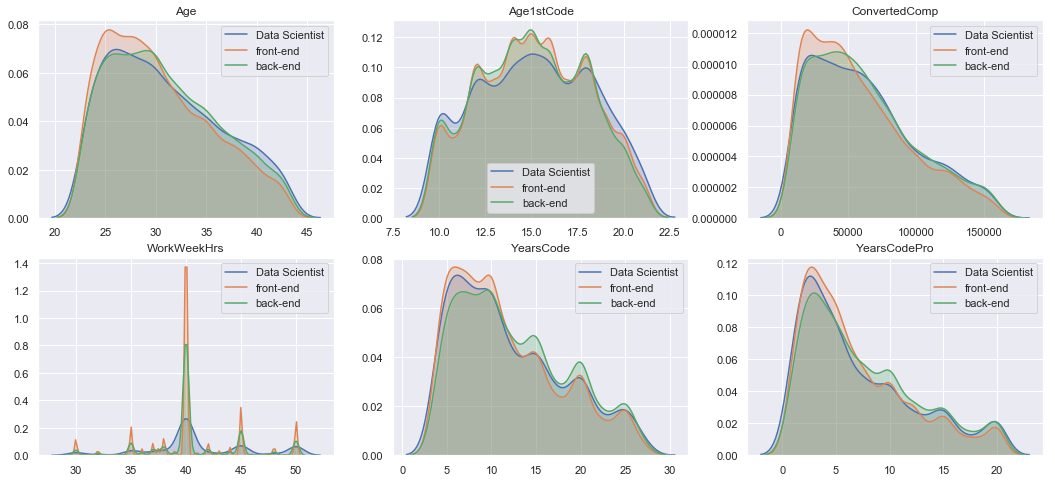

In [39]:
#our interested developer type groups
dev_types_agg = ["Data Scientist","front-end","back-end"]

#decide how much row to plot
plot_rows = math.ceil(len(numeric_columns)/3)
analysis_data = remove_numeric_outlier(df_interested)

#plot numeric data columns at scale
fig_kde, axis_kde = plt.subplots(plot_rows,3, figsize=(18, 4*plot_rows))
for attr_index in range(len(numeric_columns)):
    attr = numeric_columns[attr_index]

    #set index
    index_0, index_1 = math.floor(attr_index/3), attr_index%3
    axis_kde[index_0][index_1].set_title(attr)

    #plot data
    for dev_type in dev_types_agg:
        sns.kdeplot(analysis_data[attr][analysis_data.DevType==dev_type], label=dev_type, ax=axis_kde[index_0][index_1],shade=True); #shade 線下顏色;

###### Findings at a glimps:
* front-end developers are more young in the community -- lower age, years code, year code pro...
* can somehow interprete that front-end developers have bit lower converted compensation & as bit higher work week hours
* we may need to remove extreme values to better look at the graph

## 2. Categorical Data Overview

In [70]:
print("categorical: ",multi_sel_columns)

categorical:  ['Country', 'EdLevel', 'NEWOvertime', 'JobSat', 'OrgSize', 'UndergradMajor', 'NEWLearn', 'Hobbyist']


In [132]:
def plot_categorical_graph(df, col, index_0, index_1):
    #group each categorical column by their value, and select most frequent values
    top_5 = list(df.groupby(col)["DevType"].count().sort_values().tail(5).index)
    df[col] = df[col].apply(lambda x: x if (x in top_5) else "Other")

    #prepare temporary dataframe (groupby value in percentage) for plotting
    devtype_groupby_value = df.groupby("DevType")[col].value_counts()
    devtype_group_count = df.groupby("DevType")[col].count()
    groupby_value_percentage = devtype_groupby_value / devtype_group_count
    data = groupby_value_percentage.to_frame().rename({col: 'group_percentage'}, axis=1).reset_index()

    #select top 3 words for representing the value
    data[col] = data[col].apply(lambda x: ' '.join(x.split(" ")[0:3]))
    
    #plot data
    sns.barplot(x=col, y='group_percentage', hue='DevType', data=data, ax=axis[index_0,index_1]);

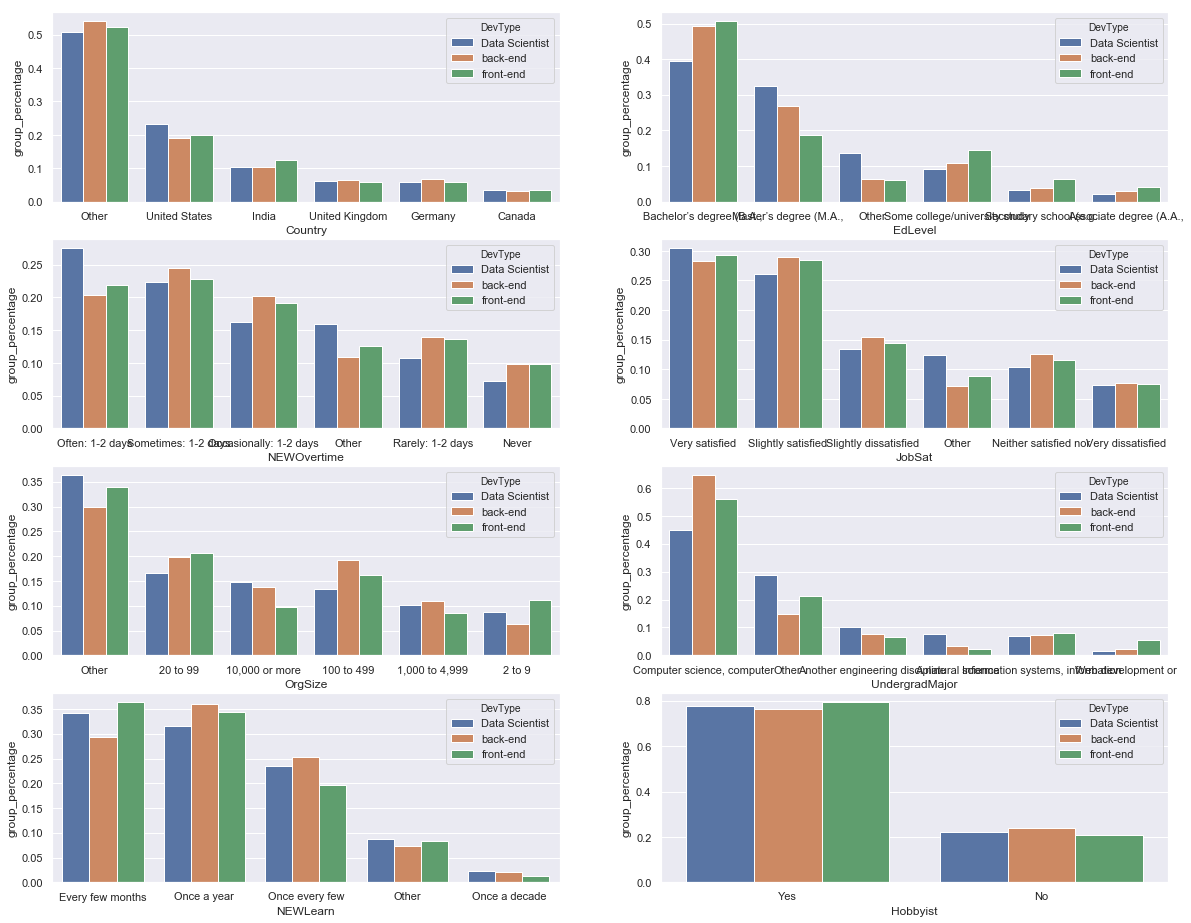

In [133]:
#decide how much row to plot
plot_rows = math.ceil(len(multi_sel_columns)/2)

#basic setup
data = df_interested.copy()
fig, axis = plt.subplots(plot_rows,2,figsize=(20,4*plot_rows))

#plot categorical data columns at scale
index = 0
for col in multi_sel_columns:
    index_0, index_1 = math.floor(index/2), index%2
    plot_categorical_graph(data, col, index_0 , index_1)
    index = index+1

###### Findings at a glimps:
* US have more data scientist percentage than others
* higher percentage of data scientists has a master degree
* higher percentage of data scientists comes from natural science background
* higher percentage of data scientists works in larger company

## Multiple Choice Data Overview
* multi-choice data have lots of infomration, but could be hard to analyze without proper parsing
* Our goal is to understand
    1. how popular is any givin choice?
    2. how is the difference between 3 types of developers? (data scientist, back-end, front-end)
* we want to parse it by 
    1. split the data by ";" 
    2. count their occurence
    3. sort by value & plot their occurence 

In [54]:
#lets take a look at the original data
df_interested[multi_choice_columns].head(3)

,JobFactors,DatabaseWorkedWith,WebframeWorkedWith,LanguageWorkedWith,PlatformWorkedWith,NEWCollabToolsWorkedWith
5,Diversity of the company or organization;Langu...,NaN,NaN,HTML/CSS;Java;JavaScript,Android;Docker;WordPress,Confluence;Github;Slack;Trello
6,NaN,NaN,NaN,C#;HTML/CSS;PHP,NaN,NaN
7,Remote work options;Opportunities for professi...,MariaDB;MySQL;Redis,Flask,Python;SQL,Docker,Confluence;Jira;Github;Slack;Microsoft Teams;G...


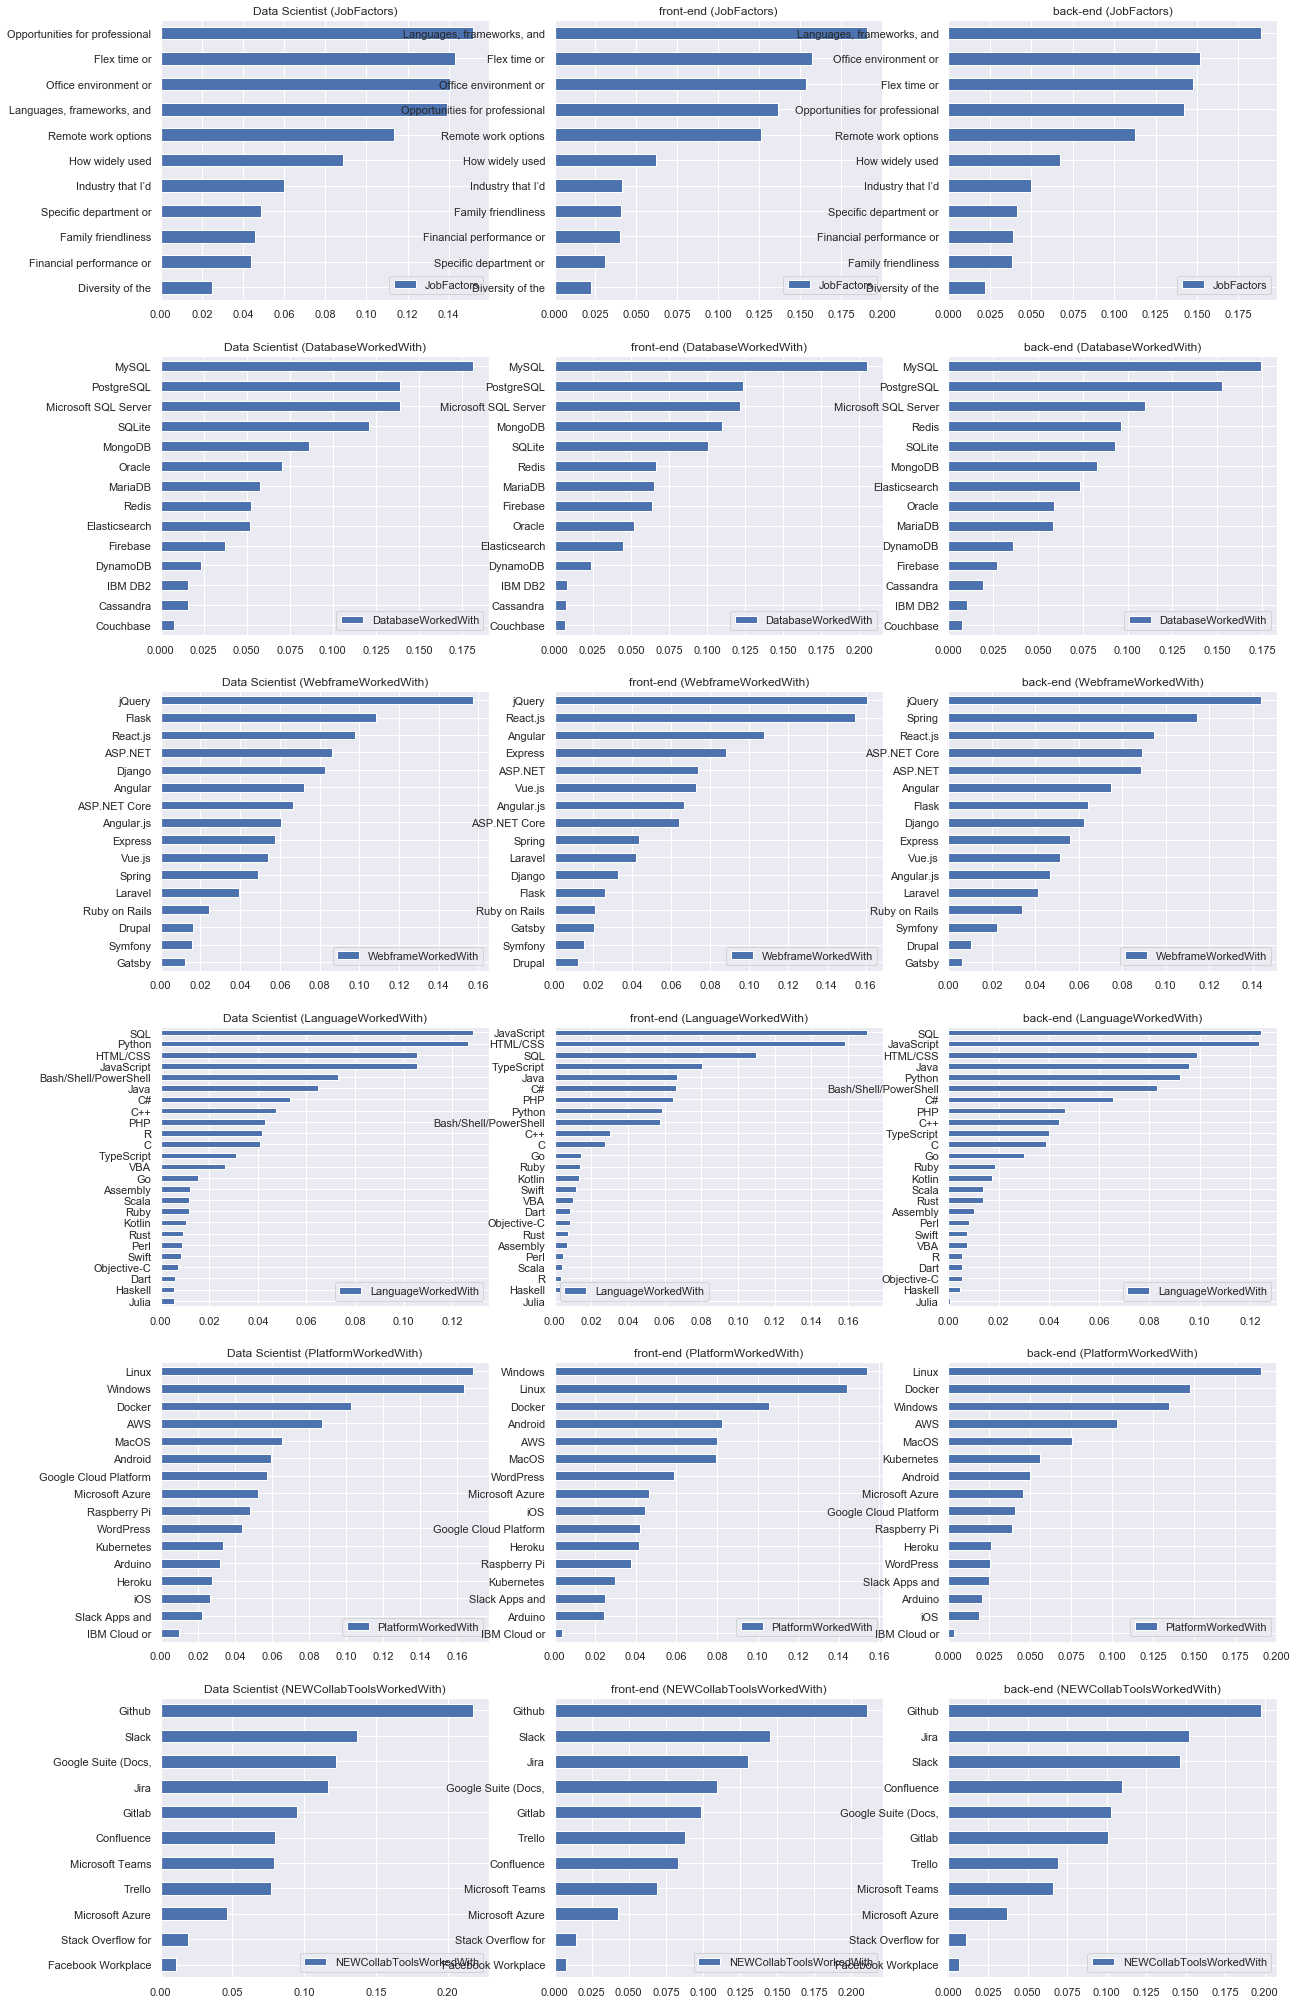

In [48]:
#basic setup
fig, axis = plt.subplots(len(multi_choice_columns),3,figsize=(20, 6*len(multi_choice_columns)))
row_index = 0 

for col in multi_sel_var:
    col_index = 0
    for dev_type in dev_types_agg:
        
        #filter selected type of developers
        temp = df_interested[df_interested["DevType"]==dev_type].copy()
        temp = temp[~temp[col].isnull()]
        
        #split multi-choice values into a string and count their occurences
        temp[col] = temp[col].apply(lambda x: x.split(';') if isinstance(x,str) else np.nan)
        count_result = dict(Counter(temp[col].sum()))
        
        #prepare dataframe for plotting
        pd_count = pd.DataFrame.from_dict(count_result, orient='index',columns=[col]).sort_values(by=col)
        
        #select top 3 words for representing the value
        pd_count = pd_count.rename(index= lambda x: ' '.join(x.split(" ")[0:3]))
        pd_count = pd_count/pd_count[col].sum()

        #plot data
        axis[row_index, col_index].set_title(dev_type+" ("+ col+")")
        pd_count.plot(kind='barh', ax=axis[row_index,col_index])
        col_index = col_index + 1
    row_index = row_index + 1

###### Findings at a glimps:
* Jobfactor: we can see that front-end & back-end developers cares about language & framework but data scientist care more about professional opportunities
* WebWorkedWith: we find Flask is quite popular between data scientist
* LanguageWorkedWith: its not surprised that python & SQL is the most popular language among data scientists

In [ ]:
#decide how much row to plot
plot_rows = math.ceil(len(multi_sel_columns)/2)

#basic setup
data = df_interested.copy()
fig, axis = plt.subplots(plot_rows,2,figsize=(20,4*plot_rows))
index = 0

#plot categorical data columns at scale
for col in multi_sel_columns:
    #group each categorical column by their value, and select most frequent values
    top_5 = list(data.groupby(col)["DevType"].count().sort_values().tail(4).index)
    data[col] = data[col].apply(lambda x: x if (x in top_5) else "Other")
    
    #prepare temporary dataframe for plotting
    groupby_var = data.groupby(col)["DevType"].value_counts()/len(data)
    groupby_var = groupby_var.to_frame().rename({"DevType": '% of developer'}, axis=1).reset_index()
    
    #select top 3 words for representing the value
    groupby_var[col] = groupby_var[col].apply(lambda x: ' '.join(x.split(" ")[0:3]))
    
    #set up index and plot the data
    index_0, index_1 = math.floor(index/2), index%2
    sns.barplot(x=col, y='% of developer', hue='DevType', data=groupby_var , ax=axis[index_0,index_1])
    index = index+1